## Introduction

## Preliminary Exploratory Data Analysis

#### Loading and Cleaning

In [63]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(httr)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Pull the data from the web and save it as a temporary file to be read later.

In [34]:
USER_MODEL_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
GET(USER_MODEL_URL, write_disk(tf <- tempfile(fileext = ".xls")))



Response [https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls]
  Date: 2021-07-21 05:43
  Status: 200
  Content-Type: application/x-httpd-php
  Size: 57.9 kB
<ON DISK>  /tmp/RtmpdJo4aL/file1f17c87e80c.xlsNULL

The data is in an excel file split between two sheets. Below, we load each sheet and add a new column to label whether or not it is training data, and fix an inconsistency in the UNS column. We then merge the two sheets and convert the UNS column to a factor.

In [49]:
training_data <- read_excel(tf, sheet = "Training_Data") %>% 
                select(STG:UNS) %>% 
                mutate(UNS = case_when(
                                       UNS == "very_low" ~ "Very Low",
                                       TRUE ~ UNS)) %>%  # TRUE works like a default case in a switch statement
                mutate(training_data = TRUE) 
test_data <- read_excel(tf, sheet = "Test_Data") %>% 
                select(STG:UNS) %>% 
                mutate(training_data = FALSE)

# combine the data
all_data <- rbind(training_data, test_data) %>% 
                mutate(UNS = as_factor(UNS))
all_data %>% head(5)

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,training_data
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.00,0.00,0.00,0.00,0.00,Very Low,TRUE
0.08,0.08,0.10,0.24,0.90,High,TRUE
0.06,0.06,0.05,0.25,0.33,Low,TRUE
0.10,0.10,0.15,0.65,0.30,Middle,TRUE
0.08,0.08,0.08,0.98,0.24,Low,TRUE


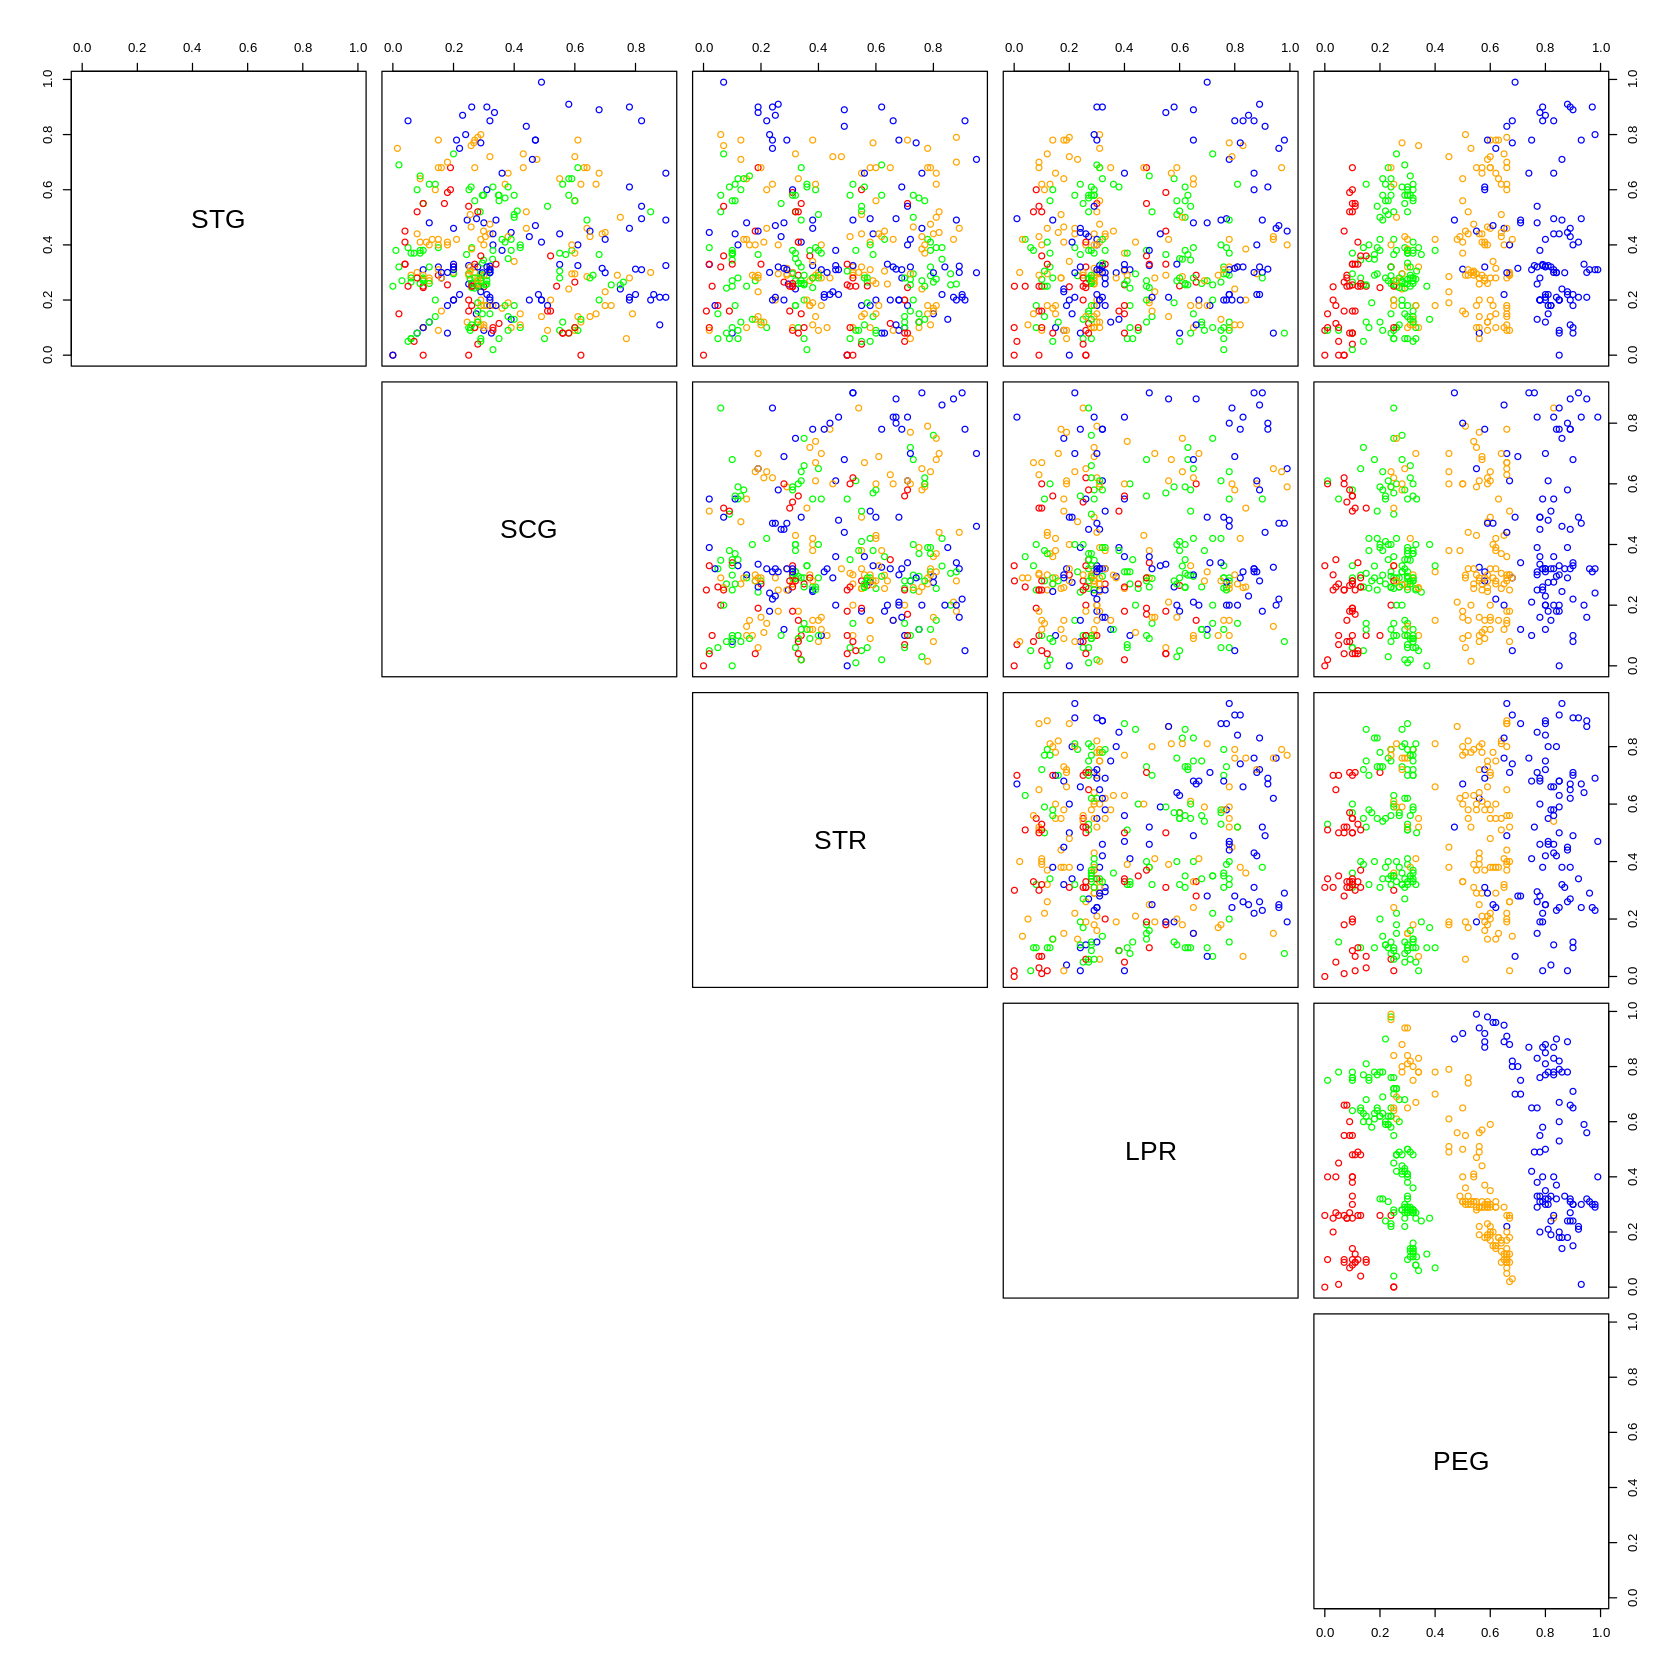

In [61]:
my_cols <- c("red", "blue", "green", "orange", "black")  

options(repr.plot.width = 14, repr.plot.height = 14)
pairs(all_data %>% select(STG:PEG),
      col = my_cols[all_data$UNS],
      lower.panel = NULL)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



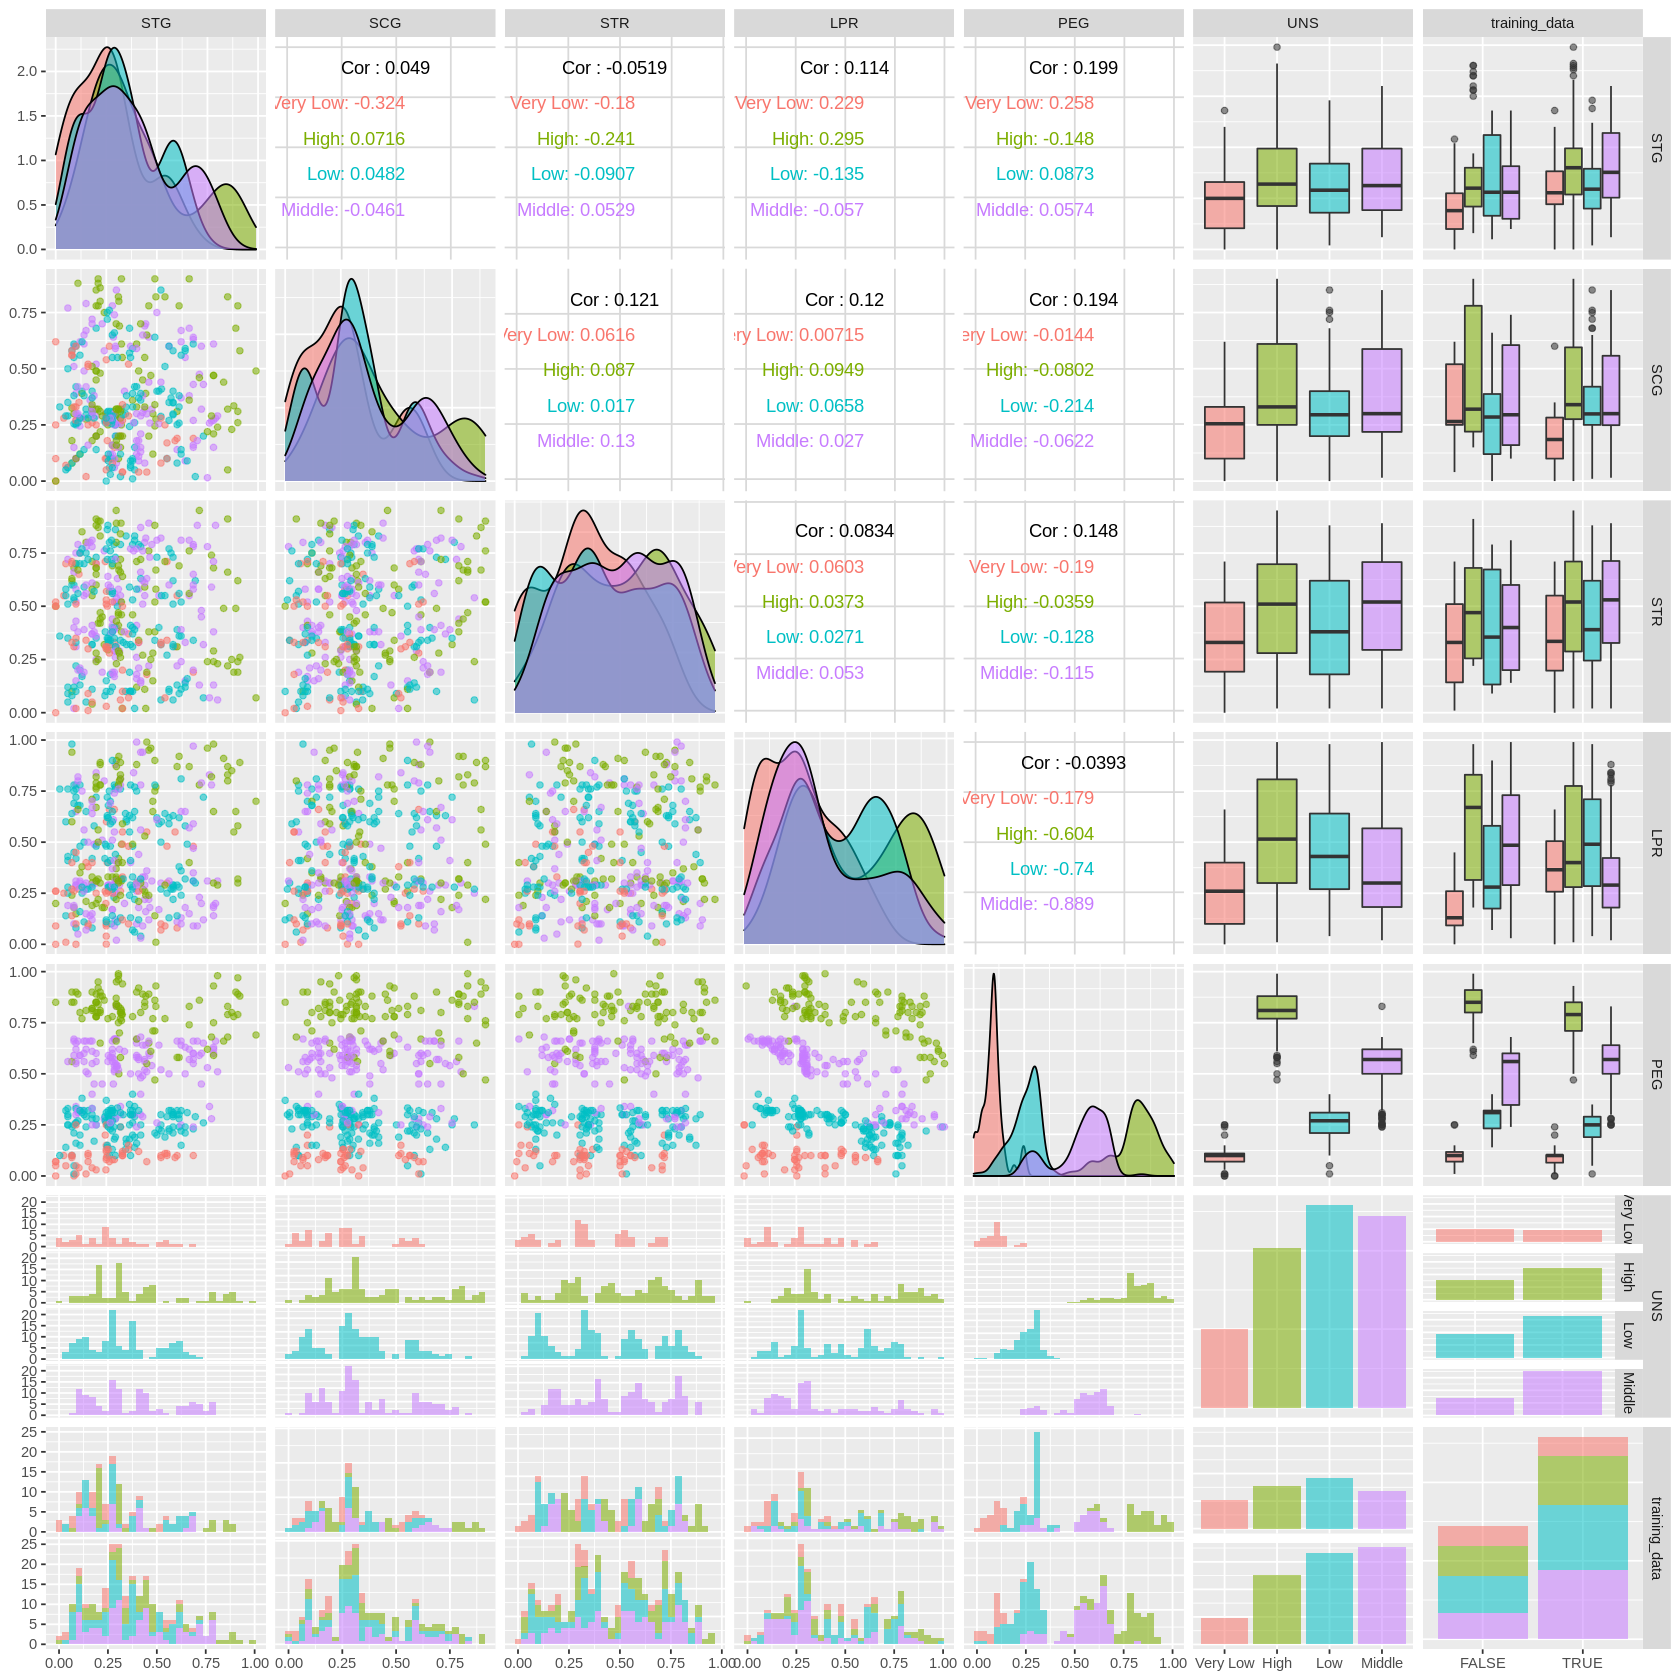

In [64]:
ggpairs(all_data,
           mapping = aes(color=UNS, alpha = 0.3))